In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('./training_data.csv'); # pandas를 이용해서 csv읽어서 df에 저장

In [3]:
df.shape; # 데이터의 row, col의 갯수

In [4]:
df.head(); # 위에서 몇개의 데이터 출력

In [5]:
df.info(); # 각 col의 데이터 형식 및 갯수 출력 / 손실된 데이터가 보인다. 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [6]:
 df.describe(); # 테이블안의 데이터 분석 출력

In [7]:
df['Credit_History'] = df['Credit_History'].astype('O'); # float ->  0 or 1

In [8]:
df.describe(include='O');

In [9]:
df.drop('Loan_ID', axis=1, inplace=True); #데이터 학습에 의미없는 Loan_id의 drop

In [10]:
df.duplicated().any(); # duplicated 안의 col에 대하여 중복된 데이터 확인 (없으니 전체)

Y 데이터의 비율 : 0.69
N 데이터의 비율 : 0.31


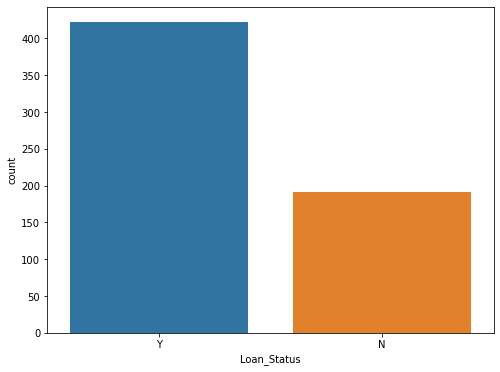

In [11]:
plt.figure(figsize=(8,6)) # matplotlib.pyplot의 figure호출, plot할 수 있는 창 생성
sns.countplot(df['Loan_Status']) # seaborn의 countplot을 이용하여 대출 상태 plot
print('Y 데이터의 비율 : %.2f' %(df['Loan_Status'].value_counts()[0] / len(df))) # Y비율 출력
print('N 데이터의 비율 : %.2f' %(df['Loan_Status'].value_counts()[1] / len(df))); # N비율 출력

In [12]:
df.columns; # col의 이름 출력

In [13]:
df.head(1);

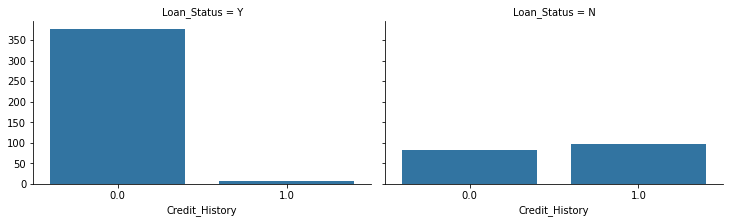

In [14]:
grid = sns.FacetGrid(df,col='Loan_Status', size=3.2, aspect=1.6) # Loan_status를 기준으로 Yes / No
grid.map(sns.countplot, 'Credit_History'); # 해당 Col의 데이터를 plot

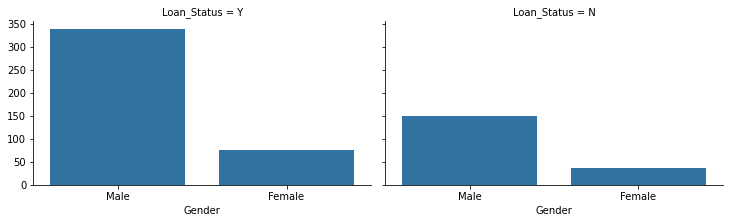

In [15]:
grid = sns.FacetGrid(df, col='Loan_Status', size=3.2, aspect = 1.6)
grid.map(sns.countplot, 'Gender'); #위와 같다

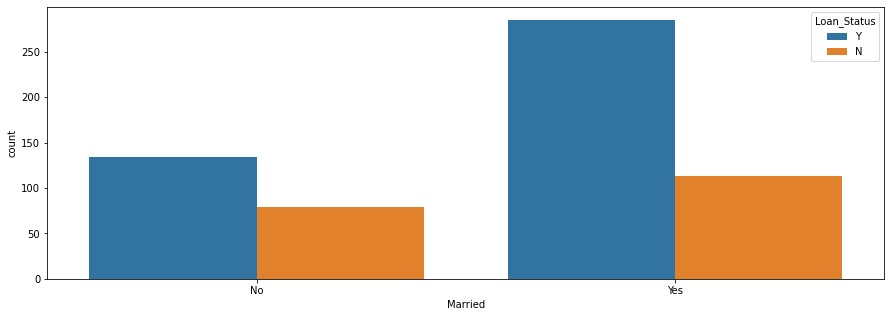

In [16]:
plt.figure(figsize=(15,5)) # 캔버스 만들기
sns.countplot(x='Married', hue='Loan_Status', data=df); # Married의 값에 대하여 Loan_Status를 비교해서 plot 해줌

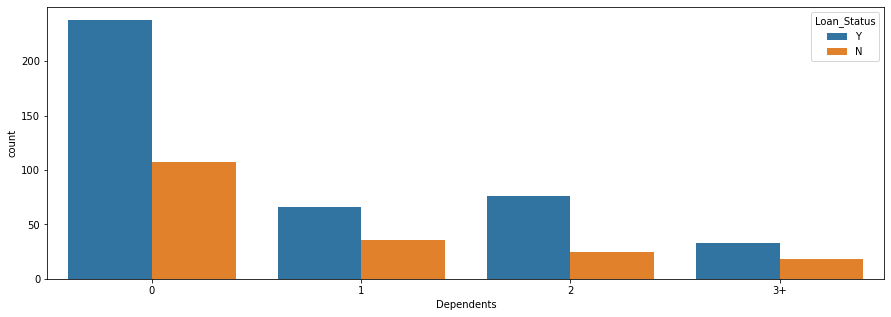

In [17]:
plt.figure(figsize=(15,5))
sns.countplot(x='Dependents', hue='Loan_Status', data=df); #Dependents에 대해  Loan_Status를 비교하며 plot

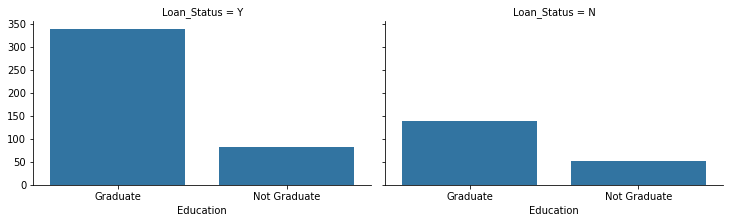

In [18]:
grid = sns.FacetGrid(df, col='Loan_Status', size=3.2, aspect=1.6)
grid.map(sns.countplot, 'Education');

<AxesSubplot:xlabel='Property_Area', ylabel='count'>

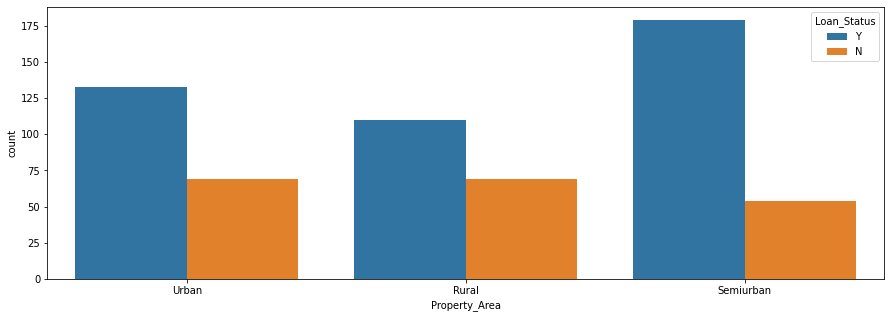

In [19]:
plt.figure(figsize=(15,5))
sns.countplot(x='Property_Area', hue='Loan_Status', data=df)

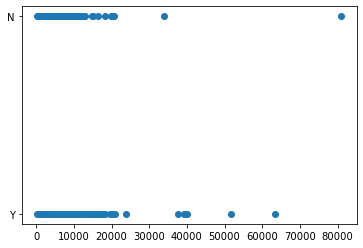

In [20]:
plt.scatter(df['ApplicantIncome'], df['Loan_Status']); 
# ApplicantIncome과 df['Loan_Status']를 점을 이용하여 plot

In [21]:
df.groupby('Loan_Status').median() 
#Loan_Status으로 그룹을 나눈 후 다른 col들에 대해서 median값을 출력

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term
Loan_Status,,,,
N,3833.5,268.0,129.0,360.0
Y,3812.5,1239.5,126.0,360.0


In [22]:
df.isnull().sum().sort_values(ascending=False) # Null인 데이터의 합을 크기순으로 정렬하여 출력

Credit_History       50
Self_Employed        32
LoanAmount           22
Dependents           15
Loan_Amount_Term     14
Gender               13
Married               3
Loan_Status           0
Property_Area         0
CoapplicantIncome     0
ApplicantIncome       0
Education             0
dtype: int64

In [23]:
# 카테고리형 데이터와 번호형 데이터를 분리함
cat_data = []
num_data = []

# i는 col_idx, c는 col이다. iloc은 한 행의 데이터를 가져오는 함수
for i,c in enumerate(df.dtypes): 
    if c == object:
        cat_data.append(df.iloc[:, i])
    else :
        num_data.append(df.iloc[:,i])

In [24]:
cat_data = pd.DataFrame(cat_data).transpose()
num_data = pd.DataFrame(num_data).transpose()

In [25]:
cat_data.head()

,Gender,Married,Dependents,Education,Self_Employed,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,1,Urban,Y
1,Male,Yes,1,Graduate,No,1,Rural,N
2,Male,Yes,0,Graduate,Yes,1,Urban,Y
3,Male,Yes,0,Not Graduate,No,1,Urban,Y
4,Male,No,0,Graduate,No,1,Urban,Y


In [26]:
num_data.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term
0,5849.0,0.0,NaN,360.0
1,4583.0,1508.0,128.0,360.0
2,3000.0,0.0,66.0,360.0
3,2583.0,2358.0,120.0,360.0
4,6000.0,0.0,141.0,360.0


In [27]:
# 가장 빈도수가 높은 값으로 빈 공간을 체움
cat_data = cat_data.apply(lambda x:x.fillna(x.value_counts().index[0]))

# null 갯수 확인, 없음
cat_data.isnull().sum().any()

False

In [28]:
# 같은 컬럼의 이전 값으로 채움 
num_data.fillna(method='bfill', inplace=True)

# null 갯수 확인, 없음
num_data.isnull().sum().any()

False

In [29]:
# 카테고리형 데이터의 라벨링을 0 ~ n-1(클래스 갯수) 로 표현해주는 라이브러리
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
cat_data.head()

,Gender,Married,Dependents,Education,Self_Employed,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,1.0,Urban,Y
4,Male,No,0,Graduate,No,1.0,Urban,Y


In [30]:
# 카테고리형의 데이터의 형태를 바꿔주기 위해서 데이터들 선언 및 생성, 원본은 삭제
target_values = {'Y' : 0, 'N' : 1}
target = cat_data['Loan_Status']
cat_data.drop('Loan_Status', axis=1, inplace=True)

# 때어낸 카테고리형 col을 target_values에 정의된형태로 매핑
target = target.map(target_values)

In [31]:
# 인코더를 이용하여 정의된 형태로 변환
for i in cat_data:
    cat_data[i] = le.fit_transform(cat_data[i])

In [32]:
target.head()

0    0
1    1
2    0
3    0
4    0
Name: Loan_Status, dtype: int64

In [33]:
cat_data.head()

,Gender,Married,Dependents,Education,Self_Employed,Credit_History,Property_Area
0,1,0,0,0,0,1,2
1,1,1,1,0,0,1,0
2,1,1,0,0,1,1,2
3,1,1,0,1,0,1,2
4,1,0,0,0,0,1,2


In [34]:
# 지금까지 만든것들을 이어 붙임
df = pd.concat([cat_data, num_data, target], axis=1)

In [35]:
df.head()

,Gender,Married,Dependents,Education,Self_Employed,Credit_History,Property_Area,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Loan_Status
0,1,0,0,0,0,1,2,5849.0,0.0,128.0,360.0,0
1,1,1,1,0,0,1,0,4583.0,1508.0,128.0,360.0,1
2,1,1,0,0,1,1,2,3000.0,0.0,66.0,360.0,0
3,1,1,0,1,0,1,2,2583.0,2358.0,120.0,360.0,0
4,1,0,0,0,0,1,2,6000.0,0.0,141.0,360.0,0


In [36]:
# traing features와 prediction을 분리
X = pd.concat([cat_data, num_data], axis=1)
y = target

In [37]:
from sklearn.model_selection import StratifiedShuffleSplit

# 데이터 셔플, 나눔
sss = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)

# train과 test로 데이터를 나눔
for train, test in sss.split(X,y) :
    X_train, X_test = X.iloc[train], X.iloc[test]
    y_train, y_test = y.iloc[train], y.iloc[test]
    
print('X_train shape', X_train.shape)
print('y_train shape', y_train.shape)
print('X_test shape', X_test.shape)
print('y_test shape', y_test.shape)

print('\nratio of target in y_train :', y_train.value_counts().values / len(y_train))
print('ratio of target in y_test :', y_test.value_counts().values / len(y_test))
print('ratio of target in original_data :', df['Loan_Status'].value_counts().values / len(df))


X_train shape (491, 11)
y_train shape (491,)
X_test shape (123, 11)
y_test shape (123,)

ratio of target in y_train : [0.68635438 0.31364562]
ratio of target in y_test : [0.69105691 0.30894309]
ratio of target in original_data : [0.68729642 0.31270358]


In [38]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

# 모델 정의
models = {
    'LogisticRegression' : LogisticRegression(random_state=42),
    'KNeighborsClassifier' : KNeighborsClassifier(),
    'SVC' : SVC(random_state=42),
    'DecisionTreeClassifier' : DecisionTreeClassifier(max_depth=1, random_state=42)
}

In [39]:
# build functions 1. loss

from sklearn.metrics import precision_score, recall_score, f1_score, log_loss, accuracy_score

# precision, recall, f1_score, log_loss, accuracy_score을 연산하고 출력해주는 함수(혹은 리턴)
def loss(y_true, y_pred, retu=False):
    pre = precision_score(y_true, y_pred)
    rec = recall_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)
    loss = log_loss(y_true, y_pred)
    acc = accuracy_score(y_true, y_pred)
    
    if retu:
        return pre, rec, f1, loss, acc
    else:
        print('  pre: %.3f\n  rec: %.3f\n  f1: %.3f\n  loss: %.3f\n  acc: %.3f' % (pre, rec, f1, loss, acc))

In [40]:
# build functions 1. train_eval_train (train된 모델을 그 train한 데이터로 평가함)

def train_eval_train(models, X, y):
    for name, model in models.items():
        print(name,':')
        model.fit(X, y) #models안의 model들로 데이터를 fit함
        loss(y, model.predict(X)) # 예측값과 실제값의 비교
        print('-'*30)
        

In [41]:
train_eval_train(models, X_train, y_train)
# 각 model에 대한 평가값

LogisticRegression :
  pre: 0.930
  rec: 0.429
  f1: 0.587
  loss: 6.542
  acc: 0.811
------------------------------
KNeighborsClassifier :
  pre: 0.667
  rec: 0.364
  f1: 0.471
  loss: 8.863
  acc: 0.743
------------------------------
SVC :
  pre: 1.000
  rec: 0.013
  f1: 0.026
  loss: 10.692
  acc: 0.690
------------------------------
DecisionTreeClassifier :
  pre: 0.929
  rec: 0.422
  f1: 0.580
  loss: 6.612
  acc: 0.809
------------------------------


In [42]:
X_train.shape

(491, 11)

In [46]:
from sklearn.model_selection import StratifiedKFold
skf = StratifiedKFold(n_splits=10, random_state=42, shuffle=True)

# 모델을 학습하고, 그 모델의 예측값고 test데이터를 비교함
def train_eval_cross(models, X, y, folds):
    # we will change X & y to dataframe because we will use iloc (iloc don't work on numpy array)
    X = pd.DataFrame(X) 
    y = pd.DataFrame(y)
    idx = [' pre', ' rec', ' f1', ' loss', ' acc']
    for name, model in models.items():
        ls = []
        print(name,':')

        for train, test in folds.split(X, y):
            model.fit(X.iloc[train], y.iloc[train]) 
            y_pred = model.predict(X.iloc[test]) 
            ls.append(loss(y.iloc[test], y_pred, retu=True))
        print(pd.DataFrame(np.array(ls).mean(axis=0), index=idx)[0])  #[0] because we don't want to show the name of the column
        print('-'*30)


In [47]:
train_eval_cross(models, X_train, y_train, skf)

LogisticRegression :
 pre     0.894048
 rec     0.422500
 f1      0.562733
 loss    6.752695
 acc     0.804490
Name: 0, dtype: float64
------------------------------
KNeighborsClassifier :
 pre      0.379834
 rec      0.207500
 f1       0.259954
 loss    12.381887
 acc      0.641510
Name: 0, dtype: float64
------------------------------
SVC :
 pre      0.000000
 rec      0.000000
 f1       0.000000
 loss    11.043955
 acc      0.680245
Name: 0, dtype: float64
------------------------------
DecisionTreeClassifier :
 pre     0.919048
 rec     0.422500
 f1      0.565740
 loss    6.611717
 acc     0.808571
Name: 0, dtype: float64
------------------------------


In [48]:
x = []
idx = [' pre', ' rec', ' f1', ' loss', ' acc']

log = LogisticRegression()

for train, test in skf.split(X_train, y_train):
    log.fit(X_train.iloc[train], y_train.iloc[train])
    # x에 error를 붙인다.
    ls = loss(y_train.iloc[test], log.predict(X_train.iloc[test]), retu=True)
    x.append(ls)

# 출력
pd.DataFrame(x, columns=idx)

,pre,rec,f1,loss,acc
0,0.875000,0.437500,0.583333,6.907771,0.800000
1,0.833333,0.333333,0.476190,7.753619,0.775510
2,0.875000,0.466667,0.608696,6.343873,0.816327
3,0.500000,0.200000,0.285714,10.573144,0.693878
4,1.000000,0.466667,0.636364,5.638984,0.836735
5,0.857143,0.400000,0.545455,7.048746,0.795918
6,1.000000,0.733333,0.846154,2.819492,0.918367
7,1.000000,0.625000,0.769231,4.229238,0.877551
8,1.000000,0.250000,0.400000,8.458476,0.755102
9,1.000000,0.312500,0.476190,7.753603,0.775510


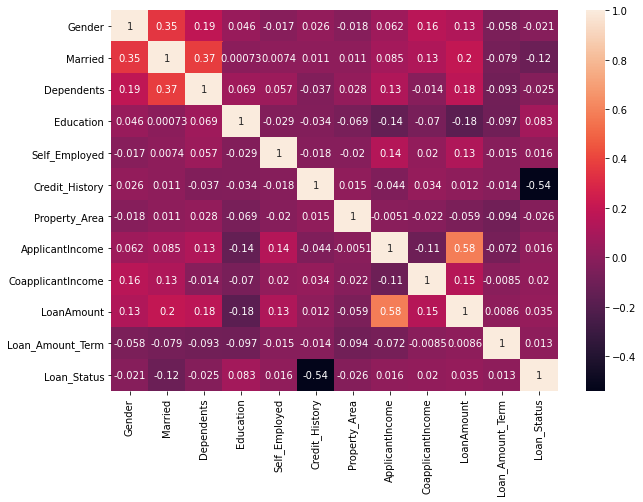

In [49]:
data_corr = pd.concat([X_train, y_train], axis=1)
corr = data_corr.corr()
plt.figure(figsize=(10,7))
sns.heatmap(corr, annot=True);
# 각 데이터 간의 상관관계를 보여줌 (유사도)

In [50]:
X_train.head()

,Gender,Married,Dependents,Education,Self_Employed,Credit_History,Property_Area,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term
415,0,0,0,0,0,1,2,2995.0,0.0,60.0,360.0
26,1,1,0,0,0,1,1,2799.0,2253.0,122.0,360.0
394,1,1,2,0,0,1,2,3100.0,1400.0,113.0,360.0
584,1,1,1,0,0,0,0,2787.0,1917.0,146.0,360.0
86,1,1,2,1,0,1,1,3333.0,2000.0,99.0,360.0


In [51]:
X_train['new_col'] = X_train['CoapplicantIncome'] / X_train['ApplicantIncome']  
X_train['new_col_2'] = X_train['LoanAmount'] * X_train['Loan_Amount_Term'] 
# 새로운 column을 생성
# 유사도가 높은 feature들을 축약

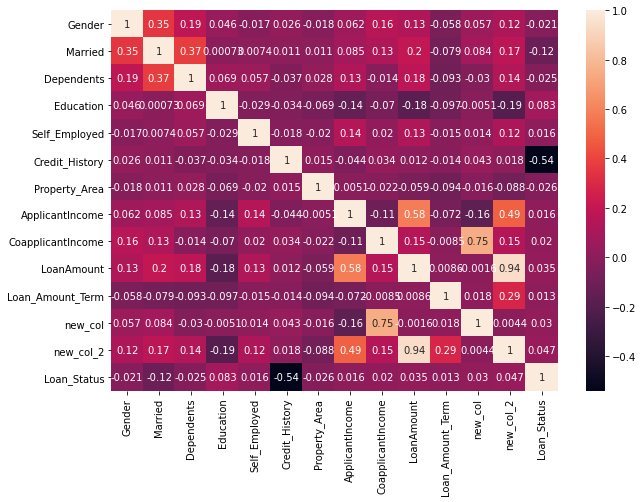

In [52]:
data_corr = pd.concat([X_train, y_train], axis=1)
corr = data_corr.corr()
plt.figure(figsize=(10,7))
sns.heatmap(corr, annot=True);

In [53]:
X_train.drop(['CoapplicantIncome', 'ApplicantIncome', 'Loan_Amount_Term', 'LoanAmount'], axis=1, inplace=True)
# 축약된 feature들을 삭제

In [54]:
train_eval_cross(models, X_train, y_train, skf)

LogisticRegression :
 pre      0.000000
 rec      0.000000
 f1       0.000000
 loss    10.832488
 acc      0.686367
Name: 0, dtype: float64
------------------------------
KNeighborsClassifier :
 pre      0.333095
 rec      0.175417
 f1       0.227944
 loss    12.810451
 acc      0.629102
Name: 0, dtype: float64
------------------------------
SVC :
 pre      0.000000
 rec      0.000000
 f1       0.000000
 loss    10.832488
 acc      0.686367
Name: 0, dtype: float64
------------------------------
DecisionTreeClassifier :
 pre     0.919048
 rec     0.422500
 f1      0.565740
 loss    6.611717
 acc     0.808571
Name: 0, dtype: float64
------------------------------


In [55]:
# 각 컬럼마다 value를 카운트 한다. 데이터가 치우친것을 확인
for i in range(X_train.shape[1]):
    print(X_train.iloc[:, i].value_counts(), end='\n----------------------\n')

1    398
0     93
Name: Gender, dtype: int64
----------------------
1    315
0    176
Name: Married, dtype: int64
----------------------
0    292
2     85
1     78
3     36
Name: Dependents, dtype: int64
----------------------
0    382
1    109
Name: Education, dtype: int64
----------------------
0    428
1     63
Name: Self_Employed, dtype: int64
----------------------
1    421
0     70
Name: Credit_History, dtype: int64
----------------------
1    179
2    170
0    142
Name: Property_Area, dtype: int64
----------------------
0.000000    222
0.414374      1
0.912892      1
1.258120      1
0.504299      1
           ... 
0.330420      1
2.332134      1
0.844471      1
0.564642      1
0.824769      1
Name: new_col, Length: 270, dtype: int64
----------------------
43200.0    18
39600.0    13
36000.0    11
57600.0    11
46080.0     9
           ..
3000.0      1
12000.0     1
9072.0      1
25920.0     1
7560.0      1
Name: new_col_2, Length: 211, dtype: int64
----------------------


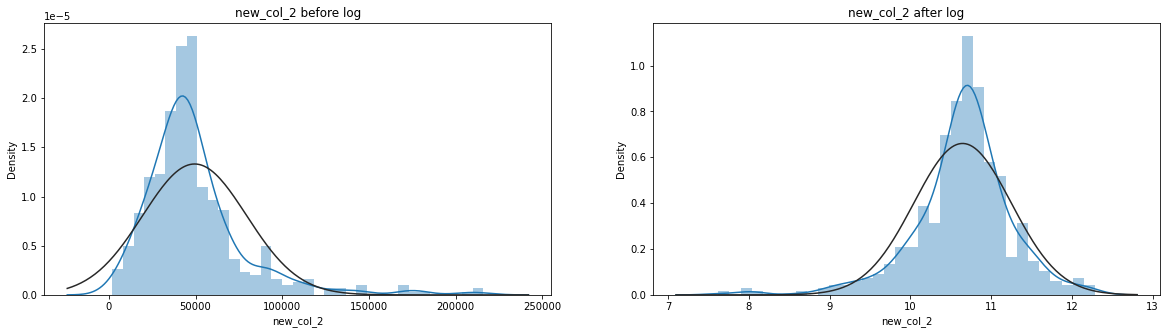

In [56]:
# 치우친 데이터를 log처리해서 정규분표형태로 만들어 준다
from scipy.stats import norm

fig, ax = plt.subplots(1,2,figsize=(20,5))

sns.distplot(X_train['new_col_2'], ax=ax[0], fit=norm)
ax[0].set_title('new_col_2 before log')

# 데이터를 log처리해준다
X_train['new_col_2'] = np.log(X_train['new_col_2'])

sns.distplot(X_train['new_col_2'], ax=ax[1], fit=norm)
ax[1].set_title('new_col_2 after log');

In [57]:
train_eval_cross(models, X_train, y_train, skf)

LogisticRegression :
 pre     0.899048
 rec     0.429167
 f1      0.569764
 loss    6.611718
 acc     0.808571
Name: 0, dtype: float64
------------------------------
KNeighborsClassifier :
 pre     0.685278
 rec     0.336667
 f1      0.439734
 loss    8.860292
 acc     0.743469
Name: 0, dtype: float64
------------------------------
SVC :
 pre     0.811548
 rec     0.311667
 f1      0.444833
 loss    7.811411
 acc     0.773837
Name: 0, dtype: float64
------------------------------
DecisionTreeClassifier :
 pre     0.919048
 rec     0.422500
 f1      0.565740
 loss    6.611717
 acc     0.808571
Name: 0, dtype: float64
------------------------------


In [58]:
print('before:')
print(X_train['new_col'].value_counts())

#float값을 boolean값으로 변경
X_train['new_col'] = [x if x==0 else 1 for x in X_train['new_col']]
print('-'*50)
# X_train['CoapplicantIncome'] > X_train['ApplicantIncome'] 는 1


print('\nafter:')
print(X_train['new_col'].value_counts())

before:
0.000000    222
0.414374      1
0.912892      1
1.258120      1
0.504299      1
           ... 
0.330420      1
2.332134      1
0.844471      1
0.564642      1
0.824769      1
Name: new_col, Length: 270, dtype: int64
--------------------------------------------------

after:
1.0    269
0.0    222
Name: new_col, dtype: int64


In [59]:
train_eval_cross(models, X_train, y_train, skf)

LogisticRegression :
 pre     0.910714
 rec     0.422500
 f1      0.562606
 loss    6.682206
 acc     0.806531
Name: 0, dtype: float64
------------------------------
KNeighborsClassifier :
 pre     0.719762
 rec     0.298333
 f1      0.406231
 loss    9.074569
 acc     0.737265
Name: 0, dtype: float64
------------------------------
SVC :
 pre     0.819048
 rec     0.324167
 f1      0.458747
 loss    7.669026
 acc     0.777959
Name: 0, dtype: float64
------------------------------
DecisionTreeClassifier :
 pre     0.919048
 rec     0.422500
 f1      0.565740
 loss    6.611717
 acc     0.808571
Name: 0, dtype: float64
------------------------------


In [60]:
# 다시 데이터 체크
for i in range(X_train.shape[1]):
    print(X_train.iloc[:,i].value_counts(), end='\n--------------\n')

1    398
0     93
Name: Gender, dtype: int64
--------------
1    315
0    176
Name: Married, dtype: int64
--------------
0    292
2     85
1     78
3     36
Name: Dependents, dtype: int64
--------------
0    382
1    109
Name: Education, dtype: int64
--------------
0    428
1     63
Name: Self_Employed, dtype: int64
--------------
1    421
0     70
Name: Credit_History, dtype: int64
--------------
1    179
2    170
0    142
Name: Property_Area, dtype: int64
--------------
1.0    269
0.0    222
Name: new_col, dtype: int64
--------------
10.673596    18
10.586584    13
10.491274    11
10.961278    11
10.738134     9
             ..
10.085809     1
9.736252      1
11.542096     1
11.616204     1
8.626944      1
Name: new_col_2, Length: 211, dtype: int64
--------------


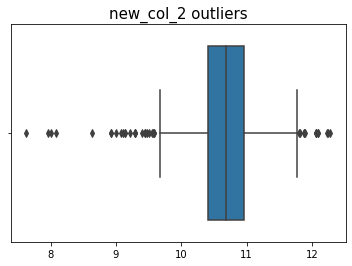

In [61]:
sns.boxplot(X_train['new_col_2']);
plt.title('new_col_2 outliers', fontsize=15)
plt.xlabel('');

In [62]:
threshold = 1.5 # 임계점

new_col_2_out = X_train['new_col_2']
# 25, 75프로로 데이터를 나눈다
q25, q75 = np.percentile(new_col_2_out, 25), np.percentile(new_col_2_out, 75)
print('Quartile 25: {} , Quartile 75: {}'.format(q25, q75))

iqr = q75 - q25
print('iqr: {}'.format(iqr))

# 떨어진 데이터를 삭제함
cut = iqr * threshold
lower, upper = q25 - cut, q75 + cut
print('Cut Off: {}'.format(cut))
print('Lower: {}'.format(lower))
print('Upper: {}'.format(upper))

outliers = [x for x in new_col_2_out if x < lower or x > upper]
print('Nubers of Outliers: {}'.format(len(outliers)))
print('outliers:{}'.format(outliers))

data_outliers = pd.concat([X_train, y_train], axis=1)
print('\nlen X_train before dropping the outliers', len(data_outliers))
data_outliers = data_outliers.drop(data_outliers[(data_outliers['new_col_2'] > upper) | (data_outliers['new_col_2'] < lower)].index)

print('len X_train before dropping the outliers', len(data_outliers))

Quartile 25: 10.416008100285975 , Quartile 75: 10.961277846683982
iqr: 0.5452697463980076
Cut Off: 0.8179046195970114
Lower: 9.598103480688962
Upper: 11.779182466280993
Nubers of Outliers: 39
outliers:[12.092679958175083, 8.930626469173578, 7.620705086838262, 12.254862809699606, 7.965545573129992, 9.574983485564092, 9.392661928770137, 9.578311275656766, 9.587406005562649, 9.112948025967533, 8.006367567650246, 9.144200569471638, 9.287301413112312, 9.441452092939569, 9.287301413112312, 12.059890135352092, 8.626944055375356, 9.51044496442652, 11.81569317484005, 9.441452092939569, 8.922658299524402, 9.287301413112312, 11.889991098556695, 12.059890135352092, 12.059890135352092, 12.231740392278752, 9.469622969906265, 9.137769679141348, 11.799607037088427, 9.084777149000837, 9.21830854162536, 8.99961934066053, 8.083328608786376, 12.283033686666302, 9.549665677579801, 11.877568578558138, 11.877568578558138, 12.100712129872347, 9.441452092939569]

len X_train before dropping the outliers 491
le

In [65]:
X_train = data_outliers.drop('Loan_Status', axis=1)
y_train = data_outliers['Loan_Status']

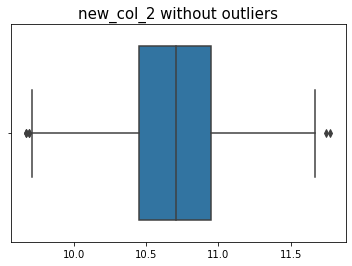

In [64]:
# 평균에서 너무 떨어진 데이터가 삭제됨을 볼 수 있다.
sns.boxplot(X_train['new_col_2']);
plt.title('new_col_2 without outliers', fontsize=15)
plt .xlabel('');

In [66]:
train_eval_cross(models, X_train, y_train, skf)

LogisticRegression :
 pre     0.907500
 rec     0.442857
 f1      0.587307
 loss    6.423889
 acc     0.814010
Name: 0, dtype: float64
------------------------------
KNeighborsClassifier :
 pre     0.753651
 rec     0.335714
 f1      0.453839
 loss    8.416145
 acc     0.756329
Name: 0, dtype: float64
------------------------------
SVC :
 pre     0.643333
 rec     0.235714
 f1      0.340616
 loss    8.406109
 acc     0.756618
Name: 0, dtype: float64
------------------------------
DecisionTreeClassifier :
 pre     0.920833
 rec     0.442857
 f1      0.589413
 loss    6.347135
 acc     0.816232
Name: 0, dtype: float64
------------------------------


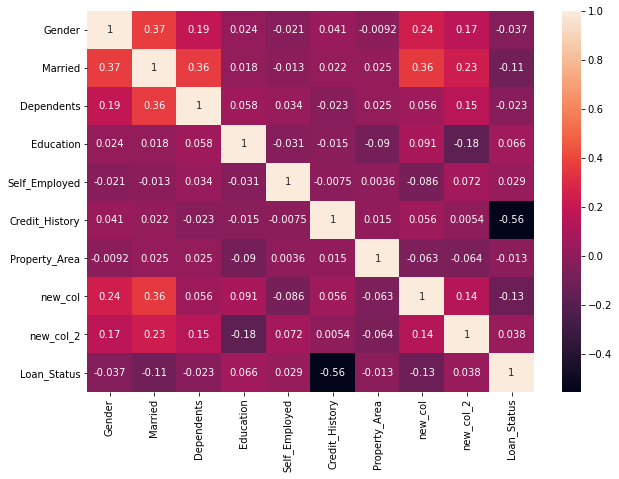

In [67]:
data_corr = pd.concat([X_train, y_train], axis=1)
corr = data_corr.corr()
plt.figure(figsize=(10,7))
sns.heatmap(corr, annot=True);

# 의미없는 Self_Employed feature를 삭제한다

In [68]:
train_eval_cross(models, X_train, y_train, skf)

LogisticRegression :
 pre     0.907500
 rec     0.442857
 f1      0.587307
 loss    6.423889
 acc     0.814010
Name: 0, dtype: float64
------------------------------
KNeighborsClassifier :
 pre     0.753651
 rec     0.335714
 f1      0.453839
 loss    8.416145
 acc     0.756329
Name: 0, dtype: float64
------------------------------
SVC :
 pre     0.643333
 rec     0.235714
 f1      0.340616
 loss    8.406109
 acc     0.756618
Name: 0, dtype: float64
------------------------------
DecisionTreeClassifier :
 pre     0.920833
 rec     0.442857
 f1      0.589413
 loss    6.347135
 acc     0.816232
Name: 0, dtype: float64
------------------------------


In [ ]:
data_corr = pd.concat([X_train, y_train], axis=1)
corr = data_corr.corr()
plt.figure(figsize=(10,7))
sns.heatmap(corr, annot=True);

In [ ]:
X_test.head()

In [ ]:
X_test_new = X_test.copy()

In [ ]:
x = []

X_test_new['new_col'] = X_test_new['CoapplicantIncome'] / X_test_new['ApplicantIncome']
X_test_new['new_col_2'] = X_test_new['LoanAmount'] * X_test_new['Loan_Amount_Term']
X_test_new.drop(['CoapplicantIncome', 'ApplicantIncome', 'Loan_Amount_Term', 'LoanAmount'], axis=1, inplace=True)

X_test_new['new_col_2'] = np.log(X_test_new['new_col_2'])

X_test_new['new_col'] = [x if x==0 else 1 for x in X_test_new['new_col']]

In [ ]:
X_test_new.head()

In [ ]:
for name,model in models.items():
    print(name, end=':\n')
    loss(y_test, model.predict(X_test_new))
    print('-'*40)